In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append("../../")

In [3]:
from utils.transformer import  DataTransformer
from utils.dataset import Dataset
from metrics.utility import efficacy_test
from sklearn.metrics import accuracy_score

In [4]:
train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=False
)

print(train_dset.data.shape)
train_dset.data.head()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [5]:
train_dset.cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [6]:
train_dset.num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<Axes: ylabel='Density'>

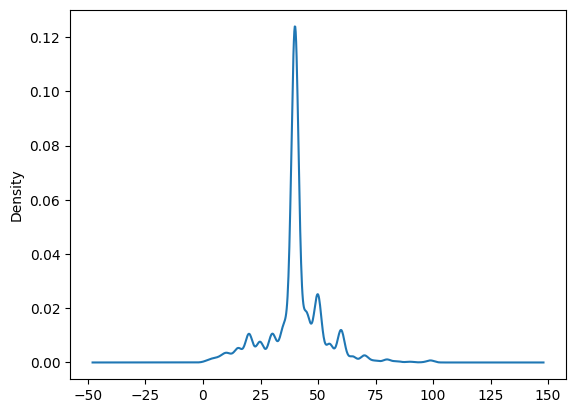

In [7]:
train_dset.data["hours-per-week"].plot(kind="density")

In [8]:
train_dset.data["education-num"].value_counts()

9.0     10501
10.0     7291
13.0     5355
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.0        51
Name: education-num, dtype: int64

## Explore filtered columns

In [9]:
train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=True
)

print(train_dset.data.shape)
train_dset.data.head()

(32561, 11)


,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
0,39.0,2174.0,0.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,White,United-States,<=50K
1,50.0,0.0,0.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,White,United-States,<=50K
2,38.0,0.0,0.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,White,United-States,<=50K
3,53.0,0.0,0.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,Black,United-States,<=50K
4,28.0,0.0,0.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,Black,Cuba,<=50K


<Axes: ylabel='Frequency'>

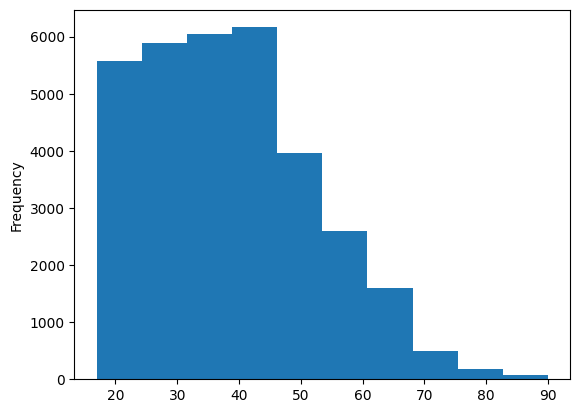

In [10]:
train_dset.data.age.plot.hist()

<Axes: >

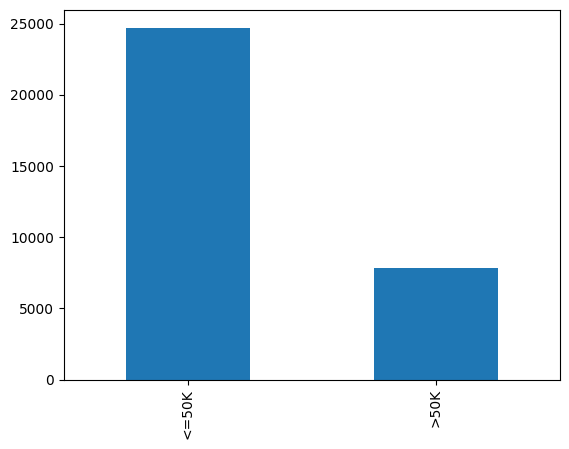

In [11]:
train_dset.data.income.value_counts().plot.bar()

In [12]:
test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    random_state=1000,
    return_filtered_cols=True
)

print(test_dset.data.shape)
test_dset.data.head()

(16281, 11)


,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
0,25.0,0.0,0.0,Private,11th,Never-married,Machine-op-inspct,Male,Black,United-States,<=50K
1,38.0,0.0,0.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,White,United-States,<=50K
2,28.0,0.0,0.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,White,United-States,>50K
3,44.0,7688.0,0.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,Black,United-States,>50K
4,18.0,0.0,0.0,?,Some-college,Never-married,?,Female,White,United-States,<=50K


<Axes: ylabel='Frequency'>

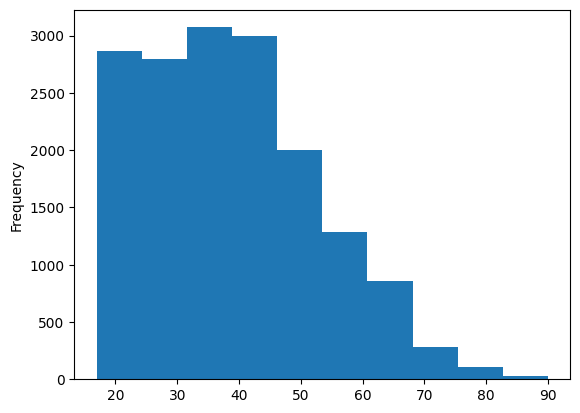

In [13]:
test_dset.data.age.plot.hist()

<Axes: >

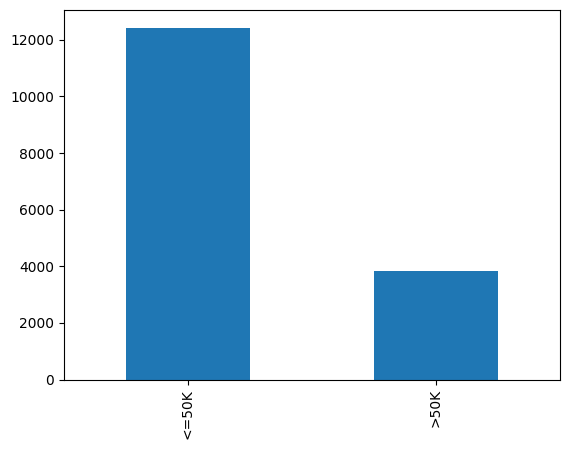

In [14]:
test_dset.data.income.value_counts().plot.bar()

## Train/Evaluate Logistic Regression model on filtered Columns 

In [15]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)

test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, 
                                  scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(32561, 11) (16281, 11)
# categorical columns: 8
features/label dim: (11, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.6710581346716855 
Acc Score: 0.8067686260057736


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train/Evaluate Logistic Regression model on all columns

In [16]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=False
)

test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=False
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, 
                                  scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(32561, 15) (16281, 15)
# categorical columns: 9
features/label dim: (15, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score: 0.6745155240675141 
Acc Score: 0.8081198943553836


## Train/Evaluate Logistic Regression model on filtered columns with varying data subsets

In [17]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [18]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=True
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    train_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        return_filtered_cols=True
        )
    train_data = train_dset.data
    
    f1_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    f1_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 20480: Train/Test-F1: 0.672/0.670 Train/Test-Acc: 0.807/0.806


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 10240: Train/Test-F1: 0.682/0.664 Train/Test-Acc: 0.812/0.801


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 5120: Train/Test-F1: 0.691/0.664 Train/Test-Acc: 0.825/0.803


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 2560: Train/Test-F1: 0.706/0.658 Train/Test-Acc: 0.829/0.801


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 1280: Train/Test-F1: 0.691/0.650 Train/Test-Acc: 0.819/0.797


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 640: Train/Test-F1: 0.688/0.645 Train/Test-Acc: 0.820/0.799


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 320: Train/Test-F1: 0.739/0.627 Train/Test-Acc: 0.856/0.800
subset: 160: Train/Test-F1: 0.729/0.615 Train/Test-Acc: 0.856/0.781
subset: 80: Train/Test-F1: 0.769/0.585 Train/Test-Acc: 0.887/0.748
subset: 40: Train/Test-F1: 0.933/0.513 Train/Test-Acc: 0.975/0.758
subset: 20: Train/Test-F1: 1.000/0.512 Train/Test-Acc: 1.000/0.731


## Train/Evaluate Logistic Regression model on all columns with varying data subsets

In [19]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [20]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=False
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    train_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        return_filtered_cols=False
        )


    train_data = train_dset.data
    
    f1_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    f1_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 20480: Train/Test-F1: 0.681/0.675 Train/Test-Acc: 0.811/0.808


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 10240: Train/Test-F1: 0.688/0.673 Train/Test-Acc: 0.814/0.806


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 5120: Train/Test-F1: 0.692/0.672 Train/Test-Acc: 0.823/0.807


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 2560: Train/Test-F1: 0.719/0.665 Train/Test-Acc: 0.837/0.804


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 1280: Train/Test-F1: 0.701/0.658 Train/Test-Acc: 0.825/0.801


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 640: Train/Test-F1: 0.698/0.654 Train/Test-Acc: 0.828/0.803


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 320: Train/Test-F1: 0.751/0.646 Train/Test-Acc: 0.866/0.809
subset: 160: Train/Test-F1: 0.706/0.633 Train/Test-Acc: 0.844/0.791
subset: 80: Train/Test-F1: 0.762/0.581 Train/Test-Acc: 0.875/0.747
subset: 40: Train/Test-F1: 0.933/0.532 Train/Test-Acc: 0.975/0.762
subset: 20: Train/Test-F1: 1.000/0.550 Train/Test-Acc: 1.000/0.741
